In [7]:
import numpy as np
import pandas as pd
import os

In [8]:
os.getcwd()

'/Users/xuwenshen/Programming/Projects/Network/youtube_similar_label'

In [14]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep = '\t', names = header)
sorted_df = df.sort_values(by = ['user_id', 'item_id'])
sorted_df.head()

,user_id,item_id,rating,timestamp
32236,1,1,5,874965758
23171,1,2,3,876893171
83307,1,3,4,878542960
62631,1,4,3,876893119
47638,1,5,3,889751712


In [35]:
user_num = sorted_df['user_id'].unique().shape[0]
item_num = sorted_df['user_id'].unique().shape[0]

In [39]:
# pivot_table
user_item_table = pd.pivot_table(sorted_df, index = 'user_id', columns = 'item_id', 
                              values = 'rating') 
user_item_table.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
user_item_matrix = user_item_table.reset_index()
user_item_matrix = user_item_matrix.as_matrix()
user_item_matrix[:,1:]

array([[ 5.,  3.,  4., ..., nan, nan, nan],
       [ 4., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 5., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan,  5., nan, ..., nan, nan, nan]])

In [97]:
# get user_item_matrix(data frame)
user_item_matrix = user_item_table.reset_index()
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix = user_item_matrix.as_matrix()
user_item_matrix = user_item_matrix[:,1:]

In [111]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(user_item_matrix, metric='cosine')
user_similarity

item_similarity = pairwise_distances(user_item_matrix.T, metric='cosine')
item_similarity.shape

(1682, 1682)

## Prediction for user-item and item-item collaborative filtering

In [109]:
pre_i_i = np.dot(user_item_matrix,item_similarity)/np.array(
    [np.abs(item_similarity).sum(axis=1)])
pre_i_i

array([[0.44627765, 0.475473  , 0.50593755, ..., 0.58815455, 0.5731069 ,
        0.56669645],
       [0.10854432, 0.13295661, 0.12558851, ..., 0.13445801, 0.13657587,
        0.13711081],
       [0.08568497, 0.09169006, 0.08764343, ..., 0.08465892, 0.08976784,
        0.09084451],
       ...,
       [0.03230047, 0.0450241 , 0.04292449, ..., 0.05302764, 0.0519099 ,
        0.05228033],
       [0.15777917, 0.17409459, 0.18900003, ..., 0.19979296, 0.19739388,
        0.20003117],
       [0.24767207, 0.24489212, 0.28263031, ..., 0.34410424, 0.33051406,
        0.33102478]])

In [112]:
user_similarity
mean.shape

(943,)

In [115]:
mean = user_item_matrix.mean(axis = 1)
diff_matrix = (user_item_matrix - mean[:, np.newaxis])
mean_matrix = mean[:, np.newaxis]
pre_u_i = mean_matrix + user_similarity.dot(diff_matrix)/np.array(
    [np.abs(item_similarity).sum(axis=1)])
pre_u_i

array([[ 1.34650827,  0.6603728 ,  0.60602963, ...,  0.50259202,
         0.50154429,  0.5015531 ],
       [ 1.03167529,  0.27120637,  0.16734104, ...,  0.03398656,
         0.03362971,  0.03388557],
       [ 1.10998533,  0.23115176,  0.12840598, ..., -0.0227045 ,
        -0.02281785, -0.02254039],
       ...,
       [ 0.95485119,  0.18171067,  0.07994122, ..., -0.05419157,
        -0.05488325, -0.05463631],
       [ 1.11129271,  0.31465489,  0.24010667, ...,  0.10206585,
         0.10136891,  0.10172079],
       [ 1.15752628,  0.41556433,  0.3632682 , ...,  0.25299222,
         0.25185376,  0.25204541]])

# SVD

In [99]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [100]:
u,s,vt = svds(user_item_matrix, k = 20)

In [101]:
u.shape

(943, 20)

In [102]:
s

array([ 75.3415951 ,  76.387996  ,  77.88652669,  79.07796788,
        81.81204105,  83.81220836,  84.34178722,  89.91150168,
        93.25844284,  93.79885965,  99.74793974, 106.8291837 ,
       121.90769976, 126.57977314, 145.87261327, 158.21191449,
       159.15359872, 217.84622472, 244.83634567, 640.63362257])

In [103]:
vt

array([[ 1.77988813e-02,  6.32714147e-03, -2.36462828e-02, ...,
        -1.73835688e-04,  1.34445640e-03, -8.15358145e-04],
       [-3.16515421e-02, -2.05355314e-02,  3.55051358e-02, ...,
         1.22396254e-03, -7.21515910e-05,  2.04913391e-03],
       [-1.48163808e-02,  1.54061939e-02,  1.03011773e-03, ...,
        -2.81051570e-05, -1.41844216e-03, -5.04356959e-05],
       ...,
       [-1.69737618e-02, -6.25039193e-02, -1.16405039e-02, ...,
         5.33024145e-04, -4.54336533e-04, -2.61400068e-04],
       [-8.72397853e-02, -7.02505798e-03, -2.86181725e-02, ...,
        -4.48134760e-04,  1.05231342e-04,  2.03151884e-04],
       [ 9.59509371e-02,  3.51795155e-02,  1.99288117e-02, ...,
         3.03747116e-05,  3.31055915e-04,  3.16852950e-04]])

In [104]:
s_matrix = np.diag(s)
X_pred = np.dot(np.dot(u, s_matrix), vt)
print (X_pred); user_item_matrix

[[ 4.01688618e+00  2.10514989e+00  1.37439578e+00 ... -3.83174025e-03
   2.64379479e-02  7.33806834e-02]
 [ 1.99295186e+00 -1.81693234e-02 -4.30251308e-03 ...  9.28078660e-03
  -2.66167393e-03 -2.95256660e-02]
 [-1.74774668e-01 -5.60278496e-02  1.81311614e-01 ...  2.16443047e-02
   1.91721169e-03  2.49374917e-04]
 ...
 [ 2.23624102e+00  3.89103327e-02  2.76077652e-01 ... -5.53764648e-03
   1.07306047e-02 -4.23773725e-03]
 [ 1.31024409e+00  1.55156267e-01 -4.75132794e-01 ...  1.50293142e-02
   1.15206267e-02 -2.94522888e-02]
 [ 1.72204325e+00  2.05335046e+00  1.18288029e+00 ... -9.89971558e-03
   1.73695571e-02  2.05937102e-02]]


array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

# Graph

In [130]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.algorithms import bipartite
G_train = nx.Graph()
for i,v,j in zip(sorted_df['user_id'],sorted_df['item_id'],sorted_df['rating']):
    G_train.add_edge(i,v,weight = j)

In [131]:
G_train

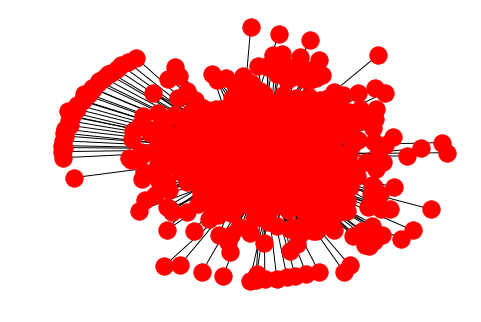

In [132]:
nx.draw(G_train)